<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Program%207%20-%20Classification%3A%20Decision%20Tree%2C%20Naive%20Bayes%2C%20KNN%20and%20SVM/Ron_Program7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Implement the classification algorithms (Decision Tree, Naive Bayes, KNN and SVM) on a single classification dataset of your choice and cross validate them.


This dataset is taken from https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
df=pd.read_csv('Penguins_data.csv')

In [ ]:
df.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
0,Adelie,Torgersen,39.1,18.7,181,3.750,male
1,Adelie,Torgersen,39.5,17.4,186,3.751,female
2,Adelie,Torgersen,40.3,18.0,196,3.752,female
3,Adelie,Torgersen,36.7,19.3,193,3.753,female
4,Adelie,Torgersen,39.3,20.6,190,3.754,male
5,Adelie,Torgersen,38.9,17.8,181,3.755,female
6,Adelie,Torgersen,39.2,19.6,195,3.756,male
7,Adelie,Torgersen,41.1,17.6,182,3.757,female
8,Adelie,Torgersen,38.6,21.2,191,3.758,male
9,Adelie,Torgersen,34.6,21.1,198,3.759,male


In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_kg', 'sex'],
      dtype='object')

In [ ]:
df.shape

(333, 7)

In [ ]:
print (df['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [ ]:
print (df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [ ]:
len(df)

333

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_kg         0
sex                  0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])
df.tail(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
313,1,1,51.5,18.7,187,4.063,1
314,1,1,49.8,17.3,198,4.064,0
315,1,1,48.1,16.4,199,4.065,0
316,1,1,51.4,19.0,201,4.066,1
317,1,1,45.7,17.3,193,4.067,0
318,1,1,50.7,19.7,203,4.068,1
319,1,1,42.5,17.3,187,4.069,0
320,1,1,52.2,18.8,197,4.070,1
321,1,1,45.2,16.6,191,4.071,0
322,1,1,49.3,19.9,203,4.072,1


In [ ]:
X=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_kg', 'sex', 'island']].values
y=df['species'].values
df.shape

(333, 7)

# Decision Tree

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()  
Xtrain= st_x.fit_transform(Xtrain)    
Xtest= st_x.transform(Xtest)
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(Xtrain, ytrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn import tree

penguinTree = tree.DecisionTreeClassifier()
dt.fit(X, y)
ypred = penguinTree.predict([[39.5, 17.4, 186, 3.751, 0, 2]])
if ypred == 0:
    print('Adelie')
elif ypred == 1:
    print('Gentoo')
else:
    print('Chinstrap')
print(accuracy_score(ytest, penguinTree.predict(Xtest)))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
X_train, X_test, y_train, y_test = train_test_split(df.drop('species',axis=1),y,test_size=0.50)
dfGNB = GaussianNB()
dfGNB.fit(Xtrain, y)

pred_class = dfGNB.predict([[39.5, 17.4, 186, 3.751, 0, 2]]) 

y_predict = dfGNB.predict(Xtrain)
l1 = [(x,y,z) for x,y,z in zip(Xtrain,ytrain,y_predict) if y!=z]
print(l1)

ValueError: ignored

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
dfGNB = GaussianNB()
dfGNB.fit(Xtrain, ytrain)


pred_class = dfGNB.predict([[39.5, 17.4, 186, 3.751, 0, 2]])

y_predict = dfGNB.predict(Xtrain)
print(accuracy_score(ytest, dfGNB.predict(Xtest)))

l1 = [(x,y,z) for x,y,z in zip(Xtrain,ytrain,y_predict) if y!=z]
print(l1)

1.0
[]


# SVM

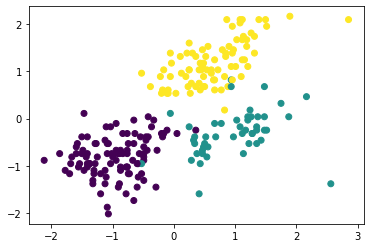

In [ ]:
from sklearn import svm
from sklearn.datasets import load_iris
import numpy as np
dfSVC = svm.SVC(kernel='linear', C=1, gamma='auto')
dfSVC.fit(Xtrain, ytrain) 
pred_class = dfSVC.predict(Xtrain)     
import matplotlib.pyplot as plt
plt.scatter( Xtrain[:,0], Xtrain[:,2], c=pred_class )
plt.show()

In [ ]:
X = Xtrain[:,:2]
Y = ytrain
model = svm.SVC(kernel='rbf', C=10, gamma='auto')
model.fit(X,Y)
Y_new = model.predict(X)
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired)

ValueError: ignored

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(df.drop('species',axis=1),y,test_size=0.50)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
preds_knn = knn.predict(X_test)
print(confusion_matrix(y_test,preds_knn))

[[61  4  0]
 [ 1 34  0]
 [ 0  0 67]]


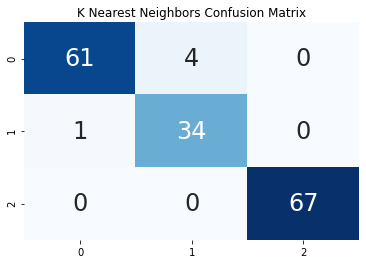

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [ ]:
print(classification_report(y_test,preds_knn))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        65
           1       0.89      0.97      0.93        35
           2       1.00      1.00      1.00        67

    accuracy                           0.97       167
   macro avg       0.96      0.97      0.96       167
weighted avg       0.97      0.97      0.97       167



# Cross Validation

In [ ]:
ypred= classifier.predict(Xtest) 
print(accuracy_score(ytest, ypred))

1.0
